## Create visualizations for both walking speed and cost analyses in a Jupyter notebook ##

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# load the dataset
df = pd.read_csv('ms_data_new.csv')
print(df)

      patient_id  visit_date    age education_level  walking_speed  \
0          P0001  2020-02-16  24.85    Some College           4.34   
1          P0001  2020-05-23  25.11    Some College           4.74   
2          P0001  2020-09-04  25.40    Some College           4.82   
3          P0001  2020-12-12  25.67    Some College           4.82   
4          P0001  2021-03-22  25.94    Some College           4.53   
...          ...         ...    ...             ...            ...   
11445      P1000  2022-12-23  60.00       Bachelors           3.47   
11446      P1000  2023-03-30  60.27       Bachelors           3.78   
11447      P1000  2023-06-25  60.51       Bachelors           3.55   
11448      P1000  2023-09-25  60.76       Bachelors           4.21   
11449      P1000  2023-12-30  61.02       Bachelors           3.71   

       education_level_code insurance_type  visit_cost  
0                         2       Platinum  281.172542  
1                         2       Platinum  2

**Scatter plot of age vs walking speed by education level with regression lines**

<Figure size 1000x600 with 0 Axes>

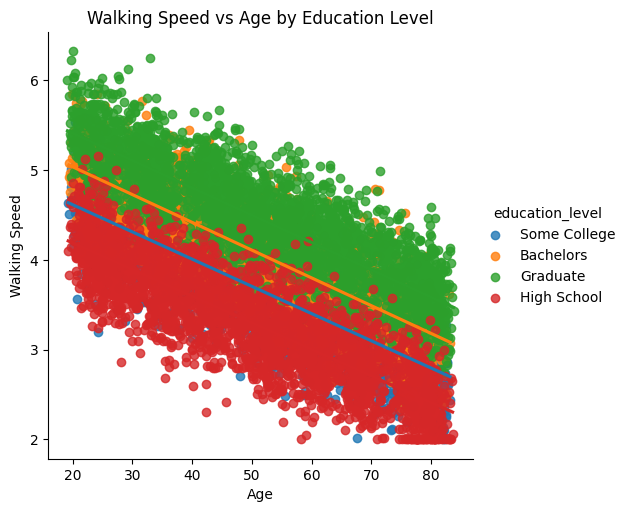

In [ ]:
plt.figure(figsize = (10, 6))
sns.lmplot(
    df, 
    x = 'age', 
    y = 'walking_speed', 
    hue = 'education_level')
plt.title('Walking Speed vs Age by Education Level')
plt.xlabel('Age')
plt.ylabel('Walking Speed')
plt.savefig('scatter_regression.png')

plt.show()

**Box plots by education level**

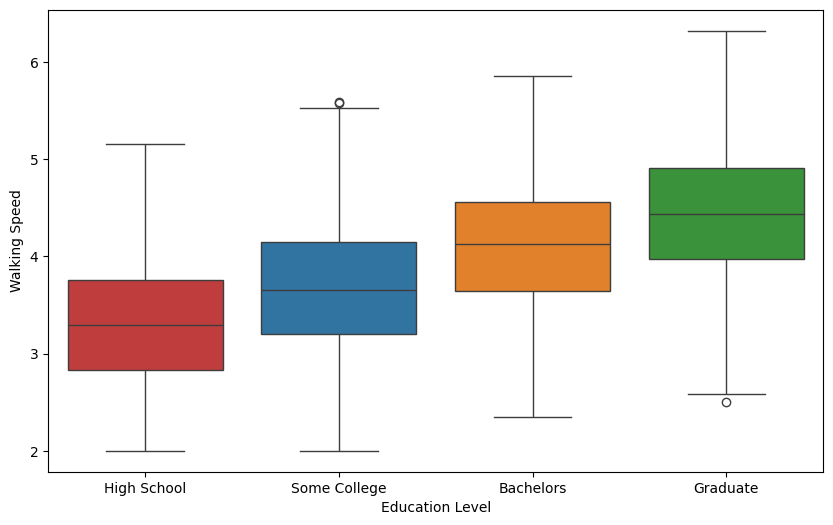

In [ ]:
order = ["High School", "Some College", "Bachelors", "Graduate"]
plt.figure(figsize = (10, 6))
sns.boxplot(
    df, 
    x = 'education_level',
    y = 'walking_speed',
    order = order,
    hue = "education_level"
)
plt.xlabel('Education Level')
plt.ylabel('Walking Speed')
plt.savefig('boxplot_education.png')

plt.show()


**Line plot showing education age interaction**

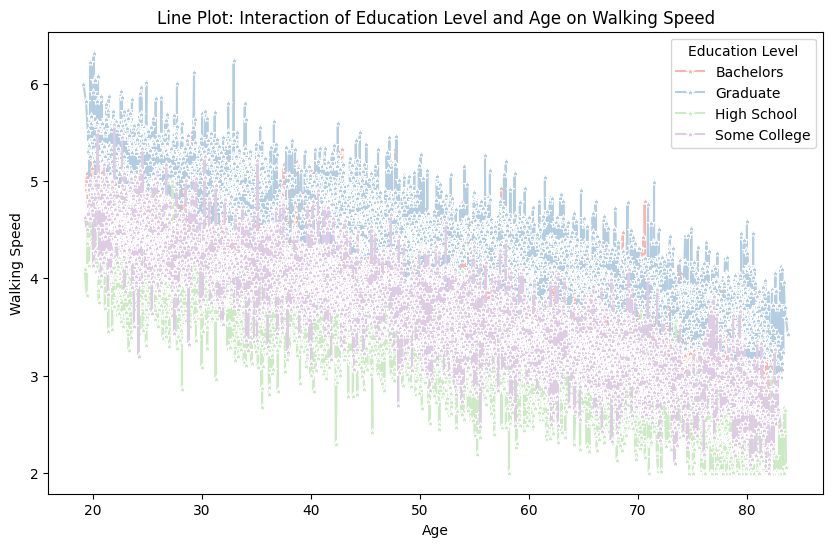

In [ ]:
interaction_data = df.groupby(['education_level', 'age']).walking_speed.mean().reset_index()

plt.figure(figsize = (10, 6))
sns.lineplot(
    interaction_data, 
    x = 'age', 
    y = 'walking_speed', 
    hue ='education_level', 
    palette = 'Pastel1',
    marker = '*'
)
plt.title('Line Plot: Interaction of Education Level and Age on Walking Speed')
plt.xlabel('Age')
plt.ylabel('Walking Speed')
plt.legend(title = 'Education Level')
plt.savefig("lineplot.png")
plt.show()

**Bar plot of mean costs by insurance type**

insurance_type
Basic       100.085441
Platinum    300.084201
Premium     200.113677
Name: visit_cost, dtype: float64


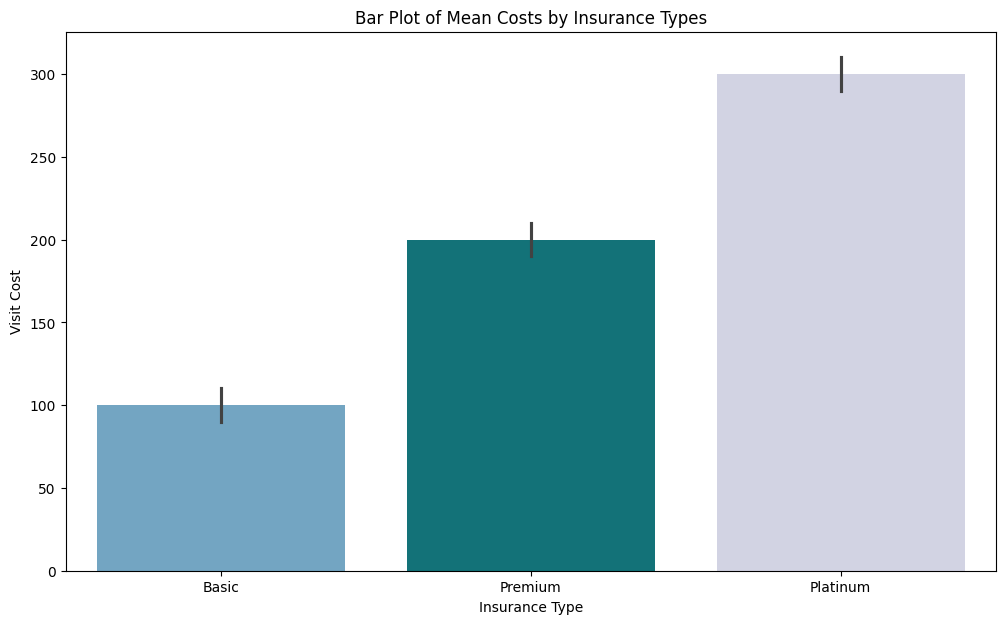

**Box plots showing cost distributions**

/tmp/ipykernel_24292/1071269618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


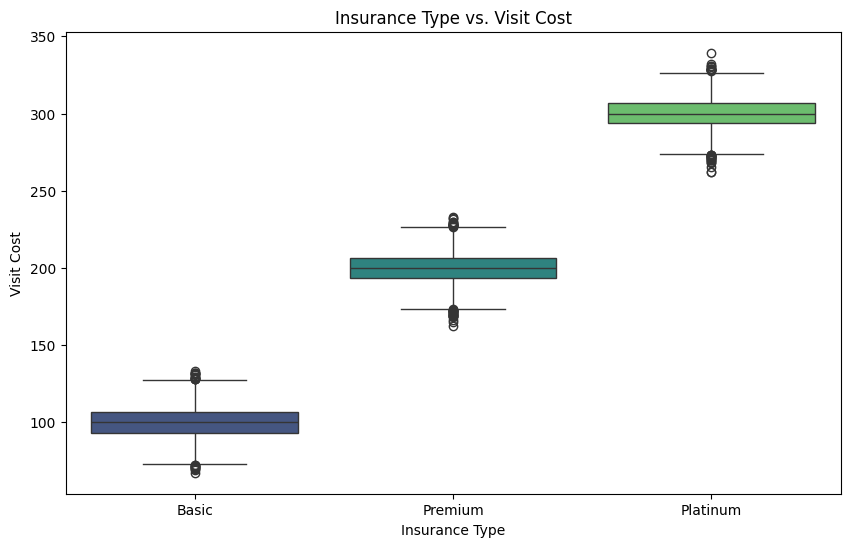

In [49]:
order = ["Basic", "Premium", "Platinum"]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, 
    x='insurance_type', 
    y='visit_cost', 
    order = order,
    palette = "viridis"
)
plt.title('Insurance Type vs. Visit Cost')
plt.xlabel('Insurance Type')
plt.ylabel('Visit Cost')
plt.savefig("boxplot_insurance.png")
plt.show()

**Pair plot of key variables**

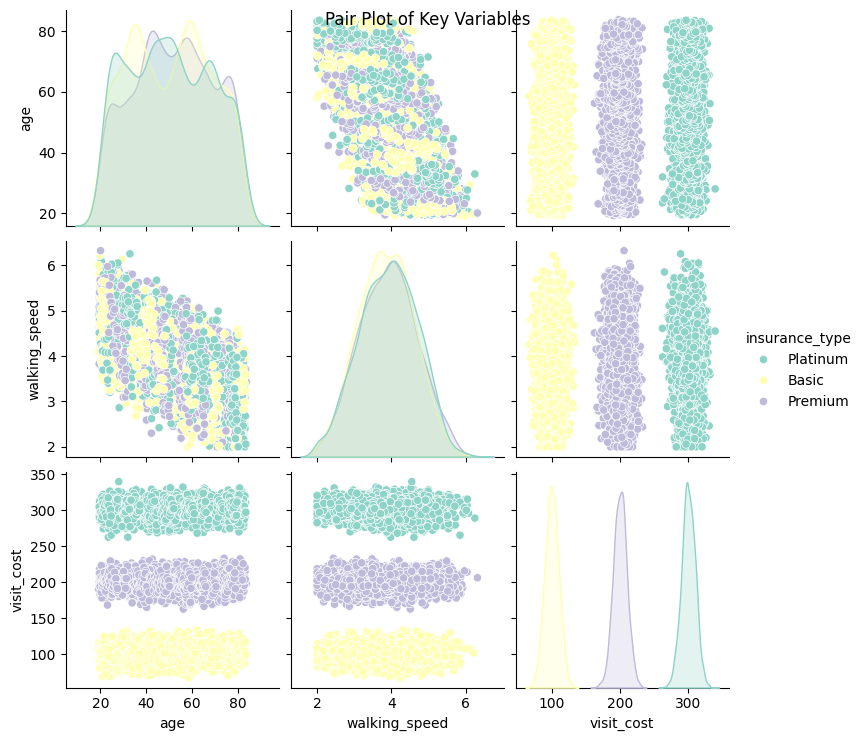

In [51]:
key_variables = ['age', 'walking_speed', 'visit_cost']

sns.pairplot(
    df, 
    vars = key_variables, 
    hue = 'insurance_type',  
    diag_kind = 'kde', 
    palette = 'Set3'
)
plt.suptitle('Pair Plot of Key Variables')
plt.savefig("pairplot.png")
plt.show()

**Faceted plots by education/insurance**

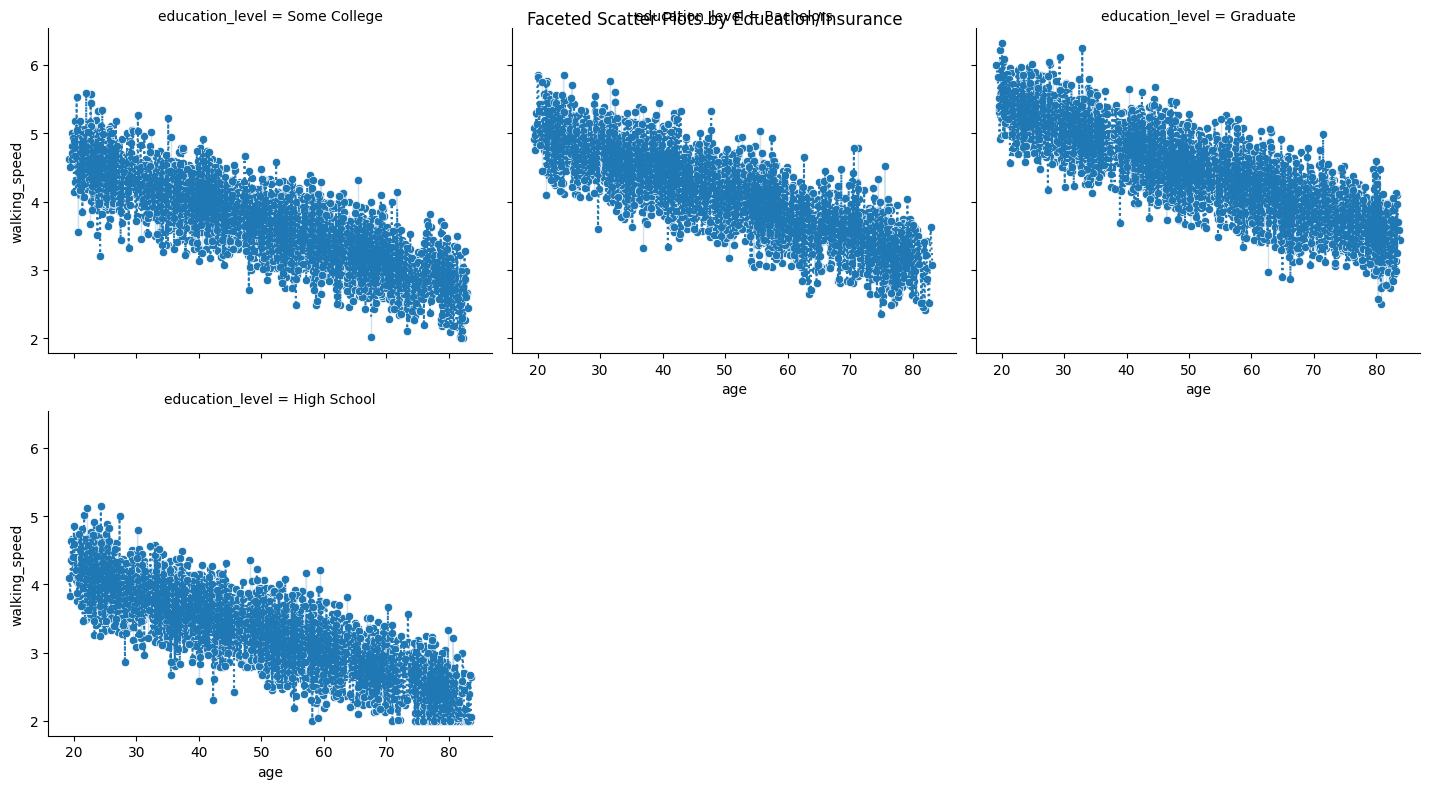

In [54]:
g = sns.FacetGrid(
    df, 
    col = 'education_level', 
    height = 4, 
    aspect = 1.2, 
    col_wrap = 3,  # adjust for multiple facets
    palette = 'magma'
)
g.map(sns.scatterplot, 'age', 'walking_speed')
g.map(sns.lineplot, 'age', 'walking_speed', linestyle=':')  # Add trends

g.fig.suptitle('Faceted Scatter Plots by Education/Insurance')
plt.savefig('facet.png')
plt.show()

**Time trends where relevant**

/tmp/ipykernel_24292/1160066504.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
/tmp/ipykernel_24292/1160066504.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
/tmp/ipykernel_24292/1160066504.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')


<Figure size 1000x600 with 0 Axes>

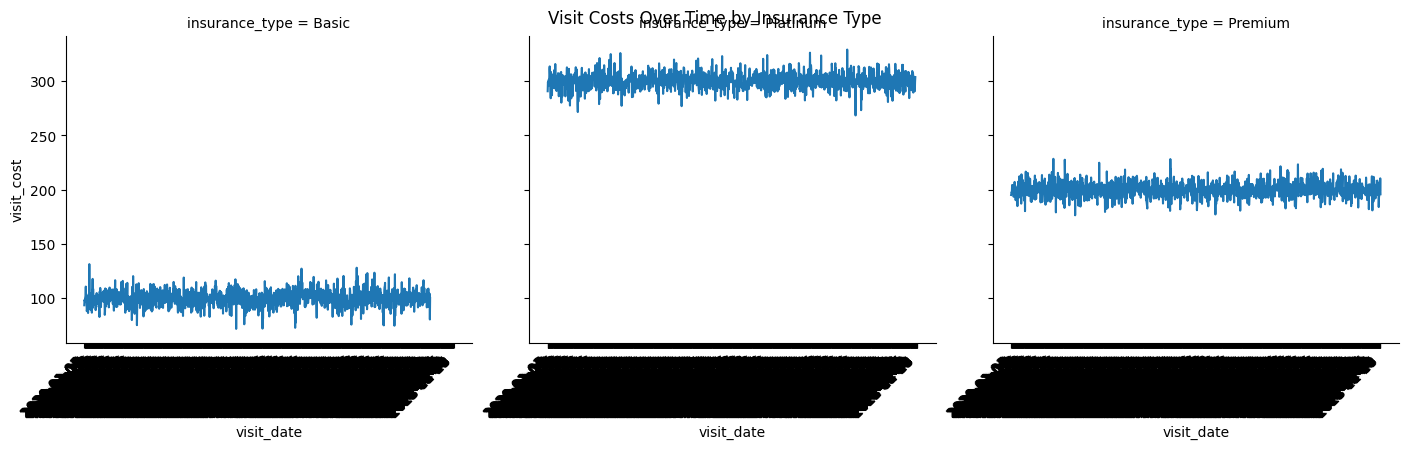

In [55]:
# Group by visit_date and insurance_type
cost_trends = df.groupby(['visit_date', 'insurance_type'])['visit_cost'].mean().reset_index()

plt.figure(figsize=(10, 6))
# Line plot of visit costs over time, faceted by insurance type
g = sns.FacetGrid(
    cost_trends, 
    col = 'insurance_type', 
    height = 4, 
    aspect = 1.2, 
    col_wrap = 3
)
g.map(sns.lineplot, 'visit_date', 'visit_cost')

g.fig.suptitle('Visit Costs Over Time by Insurance Type')
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')

plt.savefig("timetrend.png", dpi = 300)
plt.show()